In [1]:
#install pyspark if not installed

In [2]:
!pip install pyspark

     |████████████████████████████████| 217.8 MB 4.2 kB/s  eta 0:00:01
     |████████████████████████████████| 197 kB 48.9 MB/s eta 0:00:01
  Created wheel for pyspark: filename=pyspark-2.4.5-py2.py3-none-any.whl size=218258791 sha256=d390e5c140c3c547b477fac2329214dd88e9daa864deebcd2645893d4943f0c1
  Stored in directory: /root/.cache/pip/wheels/84/30/e3/c51c5cd0229631e662d29d7b578a3e5949a4c8db033ffb70aa
Successfully built pyspark


In [3]:
#importing  some required libraries
import pandas as pd
import numpy as pd
from pyspark import SparkContext, SparkConf
from pyspark.sql import SparkSession, HiveContext


In [4]:
#creating spark session
sparkSession = (SparkSession
 .builder
 .appName('example-pyspark-read-and-write-from-hive')
 .enableHiveSupport()
 .getOrCreate())

In [5]:
#Loading UNSWNB-15 and UNSWNB-15 features as a dataframe

df1 = sparkSession.read.csv('../input/unsw15/UNSW-NB15.csv',inferSchema=True,header=True)
df2 = sparkSession.read.csv('../input/unswnb15/UNSW-NB15_features.csv',inferSchema=True,header=True)
sparkSession = SparkSession.builder.appName("example-pyspark-read-and-write").getOrCreate()


In [6]:
print(df1.printSchema())
print(df2.printSchema())

root
 |-- 59.166.0.3: string (nullable = true)
 |-- 56716: integer (nullable = true)
 |-- 149.171.126.8: string (nullable = true)
 |-- 143: integer (nullable = true)
 |-- tcp: string (nullable = true)
 |-- FIN: string (nullable = true)
 |-- 0.82546002: double (nullable = true)
 |-- 7812: integer (nullable = true)
 |-- 16236: integer (nullable = true)
 |-- 31: integer (nullable = true)
 |-- 29: integer (nullable = true)
 |-- 30: integer (nullable = true)
 |-- 32: integer (nullable = true)
 |-- -: string (nullable = true)
 |-- 75090.25: double (nullable = true)
 |-- 156111.73: double (nullable = true)
 |-- 122: integer (nullable = true)
 |-- 126: integer (nullable = true)
 |-- 25518: integer (nullable = true)
 |-- 25519: integer (nullable = true)
 |-- 2751097753: long (nullable = true)
 |-- 2748686736: long (nullable = true)
 |-- 64: integer (nullable = true)
 |-- 129: integer (nullable = true)
 |-- 024: integer (nullable = true)
 |-- 025: integer (nullable = true)
 |-- 445.25928: double

In [7]:
#no of columns in df1
len(df1.columns)

49

In [8]:
#show columns of df1
df1.columns

['59.166.0.3',
 '56716',
 '149.171.126.8',
 '143',
 'tcp',
 'FIN',
 '0.82546002',
 '7812',
 '16236',
 '31',
 '29',
 '30',
 '32',
 '-',
 '75090.25',
 '156111.73',
 '122',
 '126',
 '25518',
 '25519',
 '2751097753',
 '2748686736',
 '64',
 '129',
 '024',
 '025',
 '445.25928',
 '474.9451',
 '1421970774',
 '1421970775',
 '6.8190908',
 '6.599896',
 '5.9700001E-4',
 '4.6899999E-4',
 '0.000128',
 '035',
 '036',
 '037',
 '038',
 '039',
 '2',
 '7',
 '142',
 '4',
 '144',
 '145',
 '146',
 '_c47',
 '048']

In [11]:
# So we are seeing thtat the columns are not named 
# So from UNSWBB-15_features we will get all the columns name
#So now we will use pandas df to make a headed(with column names) dataframe

import pandas as pd

d1 = pd.read_csv("../input/unsw15/UNSW-NB15.csv",names = ['srcip','sport','dstip','dsport','proto','state','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload','Dload','Spkts','Dpkts','swin','dwin','stcpb','dtcpb','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit','Stime','Ltime','Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login','ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm','attack_cat','Label'], header = None)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
#first 5 rows of d1 dataframe
d1.head()

,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.3,56716,149.171.126.8,143,tcp,FIN,0.825460,7812,16236,31,...,0,2,7,1,4,1,1,1,NaN,0
1,59.166.0.0,43467,149.171.126.6,49729,tcp,FIN,0.101815,4238,65628,31,...,0,7,4,1,6,1,1,1,NaN,0
2,59.166.0.5,41289,149.171.126.2,9574,tcp,FIN,0.044003,2750,29104,31,...,0,3,5,3,3,1,1,1,NaN,0
3,59.166.0.9,43785,149.171.126.0,6881,tcp,FIN,2.790830,10476,395734,31,...,0,11,4,3,2,1,1,1,NaN,0
4,59.166.0.8,40691,149.171.126.9,6881,tcp,FIN,2.633500,13350,548216,31,...,0,16,7,7,1,1,1,1,NaN,0


In [13]:
#Ok.. we got the required dataset


In [14]:
#So for further work on our project we will save pandas dataframe d1 into a .csv formatted dataframe combined.csv file
#d1.to_csv('combined.csv')

In [15]:
# Now we have combined.csv file 
#Loading combined.csv file as a spark dataframe
fd = sparkSession.read.csv('../input/combine-output/combined.csv',inferSchema=True,header=True)


In [16]:
#Columns in fd dataframe
fd.columns

['_c0',
 'srcip',
 'sport',
 'dstip',
 'dsport',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'stcpb',
 'dtcpb',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Stime',
 'Ltime',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [17]:
#changing column names of _c0 to id and ct_src_ ltm to ct_src_ltm
fd = fd.withColumnRenamed("ct_src_ ltm", "ct_src_ltm")
dframe = fd.withColumnRenamed("_c0", "id")

In [18]:
#Write our dataframe into hive table

dframe.write.saveAsTable('examples9')

In [19]:
# Read from Hive Table
df_load = sparkSession.sql('SELECT * FROM examples9')
df_load.show()

+-------+----------+-----+-------------+------+-----+-----+--------------------+------+------+----+----+-----+-----+-------+---------+------------------+-----+-----+----+----+----------+----------+-------+-------+-----------+-----------+------------------+------------------+----------+----------+--------------------+-------------------+--------------------+--------------------+--------------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
|     id|     srcip|sport|        dstip|dsport|proto|state|                 dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|    Sload|             Dload|Spkts|Dpkts|swin|dwin|     stcpb|     dtcpb|smeansz|dmeansz|trans_depth|res_bdy_len|              Sjit|              Djit|     Stime|     Ltime|             Sintpkt|            Dintpkt|              tcprtt|              synack|              ackdat|is_sm_ips_ports|c

In [20]:
df_load.printSchema()

root
 |-- id: integer (nullable = true)
 |-- srcip: string (nullable = true)
 |-- sport: integer (nullable = true)
 |-- dstip: string (nullable = true)
 |-- dsport: integer (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: integer (nullable = true)
 |-- dbytes: integer (nullable = true)
 |-- sttl: integer (nullable = true)
 |-- dttl: integer (nullable = true)
 |-- sloss: integer (nullable = true)
 |-- dloss: integer (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: integer (nullable = true)
 |-- Dpkts: integer (nullable = true)
 |-- swin: integer (nullable = true)
 |-- dwin: integer (nullable = true)
 |-- stcpb: long (nullable = true)
 |-- dtcpb: long (nullable = true)
 |-- smeansz: integer (nullable = true)
 |-- dmeansz: integer (nullable = true)
 |-- trans_depth: integer (nullable = true)
 |-- res_bdy_le

In [21]:
#Dropping unnecessary columns.. means they have no or negligible impact on results
columns_to_drop = ['srcip', 'sport', 'dstip', 'dsport','stcpb','dtcpb','Ltime', 'Stime']
df_load = df_load.drop(*columns_to_drop)

In [22]:
#Showing columns of updated dataframe
df_load.columns

['id',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [23]:
#Checking null values of dataframe

from pyspark.sql.functions import isnull, when, count, col

df_load.select([count(when(isnull(c), c)).alias(c) for c in df_load.columns]).show()

+---+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-------+-------+-----------+-----------+----+----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+
| id|proto|state|dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|Sload|Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|Sjit|Djit|Sintpkt|Dintpkt|tcprtt|synack|ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|
+---+-----+-----+---+------+------+----+----+-----+-----+-------+-----+-----+-----+-----+----+----+-------+-------+-----------+-----------+----+----+-------+-------+------+------+------+---------------+------------+----------------+------------+----------+----------

In [24]:
#WE can see above that there is only one variable named attack_cat which have null values

df_load.groupBy("attack_cat").count().show()

+---------------+-------+
|     attack_cat|  count|
+---------------+-------+
|          Worms|    174|
|      Shellcode|    223|
|           null|2218456|
|      Backdoors|    534|
|        Fuzzers|   5051|
|       Analysis|   2677|
|     Shellcode |   1288|
|            DoS|  16353|
|Reconnaissance |  12228|
| Reconnaissance|   1759|
|       Backdoor|   1795|
|       Fuzzers |  19195|
|       Exploits|  44525|
|        Generic| 215481|
+---------------+-------+



In [25]:
# we are seeing Reconnaissance occuriing 2 time as one is named as Reconnaissance and another Reconnaissance + 1 space.. so we can merge them by renaming another as Reconnaissance
# Fuzzers and shellcode also doing same 
#Update dataset
from pyspark.sql import functions as F
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Reconnaissance ', "Reconnaissance").otherwise(F.col("attack_cat")))
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Fuzzers ', "Reconnaissance").otherwise(F.col("attack_cat")))
df_load = df_load.withColumn("attack_cat", F.when(F.col("attack_cat")=='Shellcode ', "Reconnaissance").otherwise(F.col("attack_cat")))

In [26]:
df_load.groupBy("attack_cat").count().show()

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    174|
|     Shellcode|    223|
|          null|2218456|
|     Backdoors|    534|
|       Fuzzers|   5051|
|      Analysis|   2677|
|           DoS|  16353|
|Reconnaissance|  34470|
|      Backdoor|   1795|
|      Exploits|  44525|
|       Generic| 215481|
+--------------+-------+



In [27]:
# here null means  normal attacks, so replacing null values with  normal
df_load = df_load.na.fill('normal')

In [28]:
df_load.groupBy("attack_cat").count().show()

+--------------+-------+
|    attack_cat|  count|
+--------------+-------+
|         Worms|    174|
|     Shellcode|    223|
|     Backdoors|    534|
|        normal|2218456|
|       Fuzzers|   5051|
|      Analysis|   2677|
|           DoS|  16353|
|Reconnaissance|  34470|
|      Backdoor|   1795|
|      Exploits|  44525|
|       Generic| 215481|
+--------------+-------+



In [29]:
# As the dataset is very very large. So we are taking 1/10th of our original dataset for our further calculations

import pandas as pd

columns = df_load.schema.fieldNames()
chunks = df_load.repartition(10).rdd.mapPartitions(lambda iterator: [pd.DataFrame(list(iterator), columns=columns)]).toLocalIterator()
for pdf in chunks:
    # do work locally on chunk as pandas df
    df_x = pdf

In [30]:
# So we have created a Pandas DataFrane and will convert it into spark dataframe

In [31]:
df_x.head()

,id,proto,state,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,2244262,tcp,FIN,0.016864,2646,25564,31,29,7,15,...,0,8,8,4,4,1,1,2,normal,0
1,2369955,udp,CON,0.001122,132,164,31,29,0,0,...,0,5,4,7,13,2,1,2,normal,0
2,2171730,tcp,FIN,0.064154,2854,30856,31,29,7,17,...,0,1,3,3,1,1,1,1,normal,0
3,2500443,tcp,FIN,0.058050,4550,70924,31,29,7,33,...,0,3,4,2,4,1,1,1,normal,0
4,2251607,tcp,FIN,0.019772,2542,23516,31,29,7,14,...,0,4,10,5,2,1,1,1,normal,0


In [32]:
# Creating Spark dataframe sdf from pandas dataframe df_x
sdf = sparkSession.createDataFrame(df_x)

In [33]:
#Columns in our dataframe
sdf.columns

['id',
 'proto',
 'state',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label']

In [34]:
sdf.printSchema()

root
 |-- id: long (nullable = true)
 |-- proto: string (nullable = true)
 |-- state: string (nullable = true)
 |-- dur: double (nullable = true)
 |-- sbytes: long (nullable = true)
 |-- dbytes: long (nullable = true)
 |-- sttl: long (nullable = true)
 |-- dttl: long (nullable = true)
 |-- sloss: long (nullable = true)
 |-- dloss: long (nullable = true)
 |-- service: string (nullable = true)
 |-- Sload: double (nullable = true)
 |-- Dload: double (nullable = true)
 |-- Spkts: long (nullable = true)
 |-- Dpkts: long (nullable = true)
 |-- swin: long (nullable = true)
 |-- dwin: long (nullable = true)
 |-- smeansz: long (nullable = true)
 |-- dmeansz: long (nullable = true)
 |-- trans_depth: long (nullable = true)
 |-- res_bdy_len: long (nullable = true)
 |-- Sjit: double (nullable = true)
 |-- Djit: double (nullable = true)
 |-- Sintpkt: double (nullable = true)
 |-- Dintpkt: double (nullable = true)
 |-- tcprtt: double (nullable = true)
 |-- synack: double (nullable = true)
 |-- ackdat

In [35]:
# Checking count of protocols
sdf.groupBy("proto").count().show()

+----------+-----+
|     proto|count|
+----------+-----+
|      cphb|   13|
|      larp|   12|
|nsfnet-igp|   15|
|       dgp|    8|
|       tcf|   12|
|     crudp|   11|
|       nvp|   13|
|       igp|   17|
|      vrrp|   19|
|   mfe-nsp|   14|
|        il|   16|
|       prm|   13|
|  wb-expak|   12|
|      micp|   10|
|      ospf|  740|
|br-sat-mon|    8|
|      idrp|   16|
|        ib|    7|
| kryptolan|   14|
|sprite-rpc|   12|
+----------+-----+
only showing top 20 rows



In [36]:
#Total no of rows
sdf.count()

253974

In [37]:
#We have read our dataset and found some columns on which we can apply Indexing

# Indexing proto, state and service column's values  
from pyspark.ml.feature import StringIndexer
indexer = StringIndexer(inputCol="proto", outputCol="xProto")
sdf = indexer.fit(sdf).transform(sdf) 
indexer = StringIndexer(inputCol="state", outputCol="xState")
sdf = indexer.fit(sdf).transform(sdf) 
indexer = StringIndexer(inputCol="service", outputCol="xSer")
sdf = indexer.fit(sdf).transform(sdf) 
sdf.show()

+-------+-----+-----+--------------------+------+------+----+----+-----+-----+--------+---------+-----------+-----+-----+----+----+-------+-------+-----------+-----------+------------------+------------------+--------------------+-------------------+--------------------+--------------------+--------------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+
|     id|proto|state|                 dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|      Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|              Sjit|              Djit|             Sintpkt|            Dintpkt|              tcprtt|              synack|              ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|

In [38]:
#Dropping the columns which have indexed and some other columns as they also  have no or negligible impact on our results 
columns_to_drop = ['srcip','sport','dstip','Stime','Ltime','proto','state']
sdf = sdf.drop(*columns_to_drop)

In [39]:
sdf.columns

['id',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label',
 'xProto',
 'xState',
 'xSer']

In [40]:
#Checking number of distinct values in each columns

from pyspark.sql.functions import col, countDistinct

for column_name in sdf.columns:
    count_distinct=sdf.agg(countDistinct(col(column_name).alias("distinct_counts"))).head()[0]
    print('The number of distinct values of '+column_name+ ' is ' +str(count_distinct))

The number of distinct values of id is 253974
The number of distinct values of dur is 108542
The number of distinct values of sbytes is 4319
The number of distinct values of dbytes is 5286
The number of distinct values of sttl is 13
The number of distinct values of dttl is 9
The number of distinct values of sloss is 203
The number of distinct values of dloss is 450
The number of distinct values of service is 13
The number of distinct values of Sload is 146483
The number of distinct values of Dload is 146592
The number of distinct values of Spkts is 564
The number of distinct values of Dpkts is 723
The number of distinct values of swin is 4
The number of distinct values of dwin is 7
The number of distinct values of smeansz is 1056
The number of distinct values of dmeansz is 1233
The number of distinct values of trans_depth is 5
The number of distinct values of res_bdy_len is 687
The number of distinct values of Sjit is 145987
The number of distinct values of Djit is 152767
The number of

In [41]:
#Checking time taken to perform some queries given below

In [42]:
from time import time

t0 = time()
sdf.select("xProto", "Djit", "dbytes").groupBy("xProto").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+------+------+
|xProto| count|
+------+------+
|   8.0|    30|
|  67.0|    14|
|  70.0|    14|
|   0.0|149315|
|  69.0|    14|
|   7.0|    33|
| 112.0|    11|
| 124.0|     8|
| 128.0|     7|
| 108.0|    12|
|  88.0|    13|
|  49.0|    15|
| 101.0|    12|
|  98.0|    12|
| 116.0|    11|
|  29.0|    18|
| 107.0|    12|
|  75.0|    14|
|  64.0|    14|
|  47.0|    15|
+------+------+
only showing top 20 rows

Query performed in 1.844 seconds


In [43]:
t0 = time()
sdf.select("xProto", "Djit", "dbytes").filter(sdf.Djit<1000).filter(sdf.dbytes > 1000).groupBy("xProto").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+------+------+
|xProto| count|
+------+------+
|   0.0|109579|
|   1.0|    17|
|   5.0|     9|
|   9.0|     3|
+------+------+

Query performed in 1.888 seconds


In [44]:
t0 = time()
sdf.select("Label").groupBy("Label").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+-----+------+
|Label| count|
+-----+------+
|    0|222096|
|    1| 31878|
+-----+------+

Query performed in 1.643 seconds


In [45]:
t0 = time()
sdf.select("attack_cat").groupBy("attack_cat").count().show()
tt = time() - t0

print("Query performed in {} seconds".format(round(tt,3)))

+--------------+------+
|    attack_cat| count|
+--------------+------+
|         Worms|    17|
|     Shellcode|    18|
|     Backdoors|    54|
|        normal|222096|
|       Fuzzers|   523|
|      Analysis|   267|
|           DoS|  1718|
|Reconnaissance|  3333|
|      Backdoor|   170|
|      Exploits|  4441|
|       Generic| 21337|
+--------------+------+

Query performed in 1.761 seconds


In [46]:
#Trying some operations on some columns of our dataset (Not necessary for our calculations..) 

In [47]:
# Import Necessary data types
from pyspark.sql.functions import udf,split
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, ArrayType

# Create a function for all the data manipulations
def new_cols(sbytes,dbytes):
 if sbytes<4400: sb_Category='Small'
 elif sbytes<8000: sb_Category='Medium'
 else: sb_Category='Large'
 if dbytes<1000: db_Category='Low'
 elif dbytes<4000: db_Category='Mid'
 else: db_Category='High'
 return sb_Category,db_Category

# Apply the user defined function on the dataframe
udfB=udf(new_cols,StructType([StructField("sb_Category", StringType(), True),StructField("db_Category", StringType(), True)]))

dff=sdf.select('id','sbytes','dbytes').withColumn("newcat",udfB("sbytes","dbytes"))

# Unbundle the struct type columns into individual columns and drop the struct type 
dff1 = dff.select('id','sbytes','dbytes','newcat').withColumn('db_Category', dff.newcat.getItem('db_Category')).withColumn('sb_Category', dff.newcat.getItem('sb_Category')).drop('newcat')

dff1.show()

+-------+------+------+-----------+-----------+
|     id|sbytes|dbytes|db_Category|sb_Category|
+-------+------+------+-----------+-----------+
|2244262|  2646| 25564|       High|      Small|
|2369955|   132|   164|        Low|      Small|
|2171730|  2854| 30856|       High|      Small|
|2500443|  4550| 70924|       High|     Medium|
|2251607|  2542| 23516|       High|      Small|
|2135192|   520|   304|        Low|      Small|
|2423564|   146|   178|        Low|      Small|
|2056158|   130|   162|        Low|      Small|
|2343918|  3598| 47460|       High|      Small|
|2372121|  1038|   820|        Low|      Small|
|2134308|   264|     0|        Low|      Small|
|2330018|   424|  8824|       High|      Small|
|2114315|  3286| 39582|       High|      Small|
|2048661|  2542| 23432|       High|      Small|
|2279442|   568|   312|        Low|      Small|
|2176767|  4368|  3080|        Mid|      Small|
|2056950|  2854| 31142|       High|      Small|
|2462723|  3718| 45318|       High|     

In [48]:
from pyspark.sql.functions import concat
dff1 =dff1.withColumn('sbdb_Category', concat(dff1.db_Category,dff1.sb_Category))
dff1.show()

+-------+------+------+-----------+-----------+-------------+
|     id|sbytes|dbytes|db_Category|sb_Category|sbdb_Category|
+-------+------+------+-----------+-----------+-------------+
|2244262|  2646| 25564|       High|      Small|    HighSmall|
|2369955|   132|   164|        Low|      Small|     LowSmall|
|2171730|  2854| 30856|       High|      Small|    HighSmall|
|2500443|  4550| 70924|       High|     Medium|   HighMedium|
|2251607|  2542| 23516|       High|      Small|    HighSmall|
|2135192|   520|   304|        Low|      Small|     LowSmall|
|2423564|   146|   178|        Low|      Small|     LowSmall|
|2056158|   130|   162|        Low|      Small|     LowSmall|
|2343918|  3598| 47460|       High|      Small|    HighSmall|
|2372121|  1038|   820|        Low|      Small|     LowSmall|
|2134308|   264|     0|        Low|      Small|     LowSmall|
|2330018|   424|  8824|       High|      Small|    HighSmall|
|2114315|  3286| 39582|       High|      Small|    HighSmall|
|2048661

In [49]:
####

In [50]:
#droping duplicate rows if there exist

sdf = sdf.dropDuplicates()

In [51]:
#Showing 10 rows of our dataframe
sdf.show(10)

+-------+--------------------+------+------+----+----+-----+-----+-------+------------------+------------------+-----+-----+----+----+-------+-------+-----------+-----------+------------------+------------------+------------+-------------------+--------------------+--------------------+------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+
|     id|                 dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|             Sload|             Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|              Sjit|              Djit|     Sintpkt|            Dintpkt|              tcprtt|              synack|      ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|xProto|xState|xSer|


In [52]:
#Check total no of rows after dropping duplicates
sdf.count()

253974

In [53]:
#As we can see that there were no duplicates in our dataframe

In [55]:



#Performing next task.. Analyzing and Interpreting data



In [56]:

#Analytical method -1 Descriptive Statistic


In [57]:
# on first few columns
sdf.describe('sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload').show()

+-------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+--------------------+-----------------+
|summary|           sbytes|           dbytes|               dur|             sttl|              dttl|             sloss|             dloss|               Sload|            Dload|
+-------+-----------------+-----------------+------------------+-----------------+------------------+------------------+------------------+--------------------+-----------------+
|  count|           253974|           253974|            253974|           253974|            253974|            253974|            253974|              253974|           253974|
|   mean|4382.941777504784|36206.04439037067|0.6328746815447703|62.67014733791648|30.812299684219646|  5.18134139715089| 16.25452999125895| 3.715130628307725E7|2442957.701711773|
| stddev|54793.66636328358| 161920.632366685|3.5008568804957956|74.46258874667143| 42.93671085368629|22.1

In [58]:
#On next few columns
sdf.describe('Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit').show()

+-------+------------------+------------------+------------------+------------------+------------------+-----------------+-------------------+-----------------+------------------+
|summary|             Spkts|             Dpkts|              swin|              dwin|           smeansz|          dmeansz|        trans_depth|      res_bdy_len|              Sjit|
+-------+------------------+------------------+------------------+------------------+------------------+-----------------+-------------------+-----------------+------------------+
|  count|            253974|            253974|            253974|            253974|            253974|           253974|             253974|           253974|            253974|
|   mean|33.241847590698264| 42.57320434375172| 149.9144636852591|149.56760928283998|124.55280855520644|276.0409254490617| 0.0826305054848134|4222.095557025522|1565.1332206037866|
| stddev| 75.61516972357414|122.21268821611213|125.51434920962923|125.57528713483354|152.43033049579

In [59]:
sdf.describe('Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst').show()

+-------+-----------------+------------------+------------------+--------------------+--------------------+--------------------+-----------------+------------------+
|summary|             Djit|           Sintpkt|           Dintpkt|              tcprtt|              synack|              ackdat|       ct_srv_src|        ct_srv_dst|
+-------+-----------------+------------------+------------------+--------------------+--------------------+--------------------+-----------------+------------------+
|  count|           253974|            253974|            253974|              253974|              253974|              253974|           253974|            253974|
|   mean|722.0569858346457| 187.6994481188409|  76.9267119483252|0.006279939919036445|0.003354168888869765|0.002925771032877...|9.210462488286202| 8.992333860946395|
| stddev|3325.142494362646|2737.1182145007547|1412.5168488164745| 0.05066798669606137| 0.02900211039544479| 0.02527753895825096|10.84526931512568|10.832474201610799|
|   

In [60]:
#On last few columns
sdf.describe('ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm').show()

+-------+-----------------+-----------------+-----------------+------------------+------------------+
|summary|       ct_dst_ltm|       ct_src_ltm| ct_src_dport_ltm|  ct_dst_sport_ltm|    ct_dst_src_ltm|
+-------+-----------------+-----------------+-----------------+------------------+------------------+
|  count|           253974|           253974|           253974|            253974|            253974|
|   mean|6.448191547166245|6.904844590391142| 4.64178616708797|3.5943915518911385| 6.845106191972406|
| stddev|8.162105772656675|8.199586766100202|8.477543340327781| 6.185866480409601|11.263996599893002|
|    min|                1|                1|                1|                 1|                 1|
|    max|               67|               67|               67|                60|                67|
+-------+-----------------+-----------------+-----------------+------------------+------------------+



In [61]:


#Anltical method 2 stsistical 



In [62]:
#for some features calculating mean , min and max
from pyspark.sql.functions import mean, min, max
colms = ['sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload']
for i in range(len(colms)):
    clm = colms[i]
    sdf.select([mean(clm), min(clm), max(clm)]).show()

+-----------------+-----------+-----------+
|      avg(sbytes)|min(sbytes)|max(sbytes)|
+-----------------+-----------+-----------+
|4382.941777504784|         24|   11085528|
+-----------------+-----------+-----------+

+-----------------+-----------+-----------+
|      avg(dbytes)|min(dbytes)|max(dbytes)|
+-----------------+-----------+-----------+
|36206.04439037067|          0|   14657531|
+-----------------+-----------+-----------+

+-----------------+---------+---------+
|        avg(sttl)|min(sttl)|max(sttl)|
+-----------------+---------+---------+
|62.67014733791648|        0|      255|
+-----------------+---------+---------+

+------------------+---------+---------+
|         avg(dttl)|min(dttl)|max(dttl)|
+------------------+---------+---------+
|30.812299684219646|        0|      254|
+------------------+---------+---------+

+----------------+----------+----------+
|      avg(sloss)|min(sloss)|max(sloss)|
+----------------+----------+----------+
|5.18134139715089|         0

In [63]:



#Analytical method 3 : Covariance





In [64]:
#Sample covarience on some pairs of columns

print("Covariance between sbytes and dbytes", sdf.stat.cov('sbytes', 'dbytes'))
print("Covariance between sloss and dloss", sdf.stat.cov('sloss', 'dloss'))
print("Covariance between Sload and Dload",sdf.stat.cov('Sload', 'Dload'))
print("Covariance between swin and dwin",sdf.stat.cov('swin', 'dwin'))

Covariance between sbytes and dbytes 421801804.4270864
Covariance between sloss and dloss 193.45977472692994
Covariance between Sload and Dload -87682551555295.05
Covariance between swin and dwin 15716.943264614982


In [65]:


#Analytical method 4 : Correlations



[[1.0, 0.04754182849613028, 0.13771080606199032, -0.011583727023201047, 0.07314018783556143, 0.9509379776592324, 0.05195540267522034, -0.021575919620817452, -0.0074392992510374165, 0.5965333001500872, 0.10991484291404784, 0.06250299916263974, 0.06267447486889882, 0.19940542884446796, 0.015761731981193114, -0.0006585865956146056, 0.020276952877379233, 0.0017742439544465023, 0.0013872807270503755, -0.004857411156244404, -0.002702179629110852, 0.030342971387879634, 0.0262289224133789, 0.030727799904425174, -0.036645222842697174, -0.03673086148421072, -0.02843642850781721, -0.028731751997968763, -0.029019434223984, -0.029047359534296206, -0.03200531636431103], [0.04754182849613028, 1.0, 0.34831401866238104, -0.09270651363244808, 0.010866764081476167, 0.11455072900948361, 0.9911223303216371, -0.06848011222304452, 0.08434271314042906, 0.7247334248233818, 0.9705718601046779, 0.18659221126971567, 0.1871191342253986, -0.09291882397234537, 0.5872676219235758, 0.13614621290976942, 0.5511410347549

+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|              sbytes|              dbytes|                 dur|                sttl|                dttl|               sloss|               dloss|               Sload|               Dload|               Spkts|               Dpkts|                swin|                dwin|             smeansz|             dmeansz|         trans_depth|         r

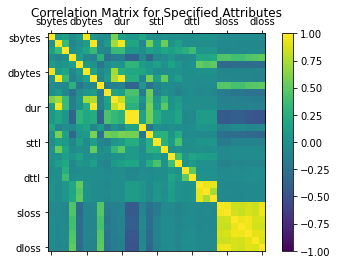

In [66]:
import matplotlib.pyplot as plt
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.stat import Correlation

columns = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']


vector_col = "corr_features"
assembler = VectorAssembler(inputCols = columns, 
                            outputCol = vector_col)
myGraph_vector = assembler.transform(sdf).select(vector_col)
matrix = Correlation.corr(myGraph_vector, vector_col)


matrix = Correlation.corr(myGraph_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()
print(corrmatrix)


df = sparkSession.createDataFrame(corrmatrix,columns)
df.show()


def plot_corr_matrix(correlations,attr,fig_no):
    fig=plt.figure(fig_no)
    ax=fig.add_subplot(111)
    ax.set_title("Correlation Matrix for Specified Attributes")
    ax.set_xticklabels(['']+attr)
    ax.set_yticklabels(['']+attr)
    cax=ax.matshow(correlations,vmax=1,vmin=-1)
    fig.colorbar(cax)
    plt.show()

plot_corr_matrix(corrmatrix, columns, 234)

In [67]:
#another method to calculate correlation between some pairs
# correlation on some pairs of columns
print("Correlation between sbytes and dbytes", sdf.stat.corr('sbytes', 'dbytes'))
print("Correlation between sloss and dloss", sdf.stat.corr('sloss', 'dloss'))
print("Correlation between Sload and Dload",sdf.stat.corr('Sload', 'Dload'))
print("Correlation between swin and dwin",sdf.stat.corr('swin', 'dwin'))
print("Correlation between swin and dwin",sdf.stat.corr('sttl', 'dttl'))

Correlation between sbytes and dbytes 0.04754182849613028
Correlation between sloss and dloss 0.15343527407926302
Correlation between Sload and Dload -0.17289783191151697
Correlation between swin and dwin 0.997173037104479
Correlation between swin and dwin 0.11852399024503275


In [68]:



#Analytical method 5 : Frequents items





In [69]:
#Frequent Items:  the following code finds the frequent items that show up 40% of the time for each column

sdf.stat.freqItems(['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin',
                    'smeansz','dmeansz','trans_depth','res_bdy_len','Sjit'], 0.4).collect()[0]

Row(sbytes_freqItems=[114, 264], dbytes_freqItems=[178, 0], dur_freqItems=[0.0047149997999999995, 9.0000003e-06], sttl_freqItems=[254, 31], dttl_freqItems=[29, 0], sloss_freqItems=[7, 0], dloss_freqItems=[12, 0], Sload_freqItems=[], Dload_freqItems=[75699.984, 0.0], Spkts_freqItems=[2], Dpkts_freqItems=[2, 0], swin_freqItems=[255, 0], dwin_freqItems=[255, 0], smeansz_freqItems=[132, 57], dmeansz_freqItems=[89, 0], trans_depth_freqItems=[1, 0], res_bdy_len_freqItems=[3924, 0], Sjit_freqItems=[0.0])

In [70]:
#Displaying dataframe
display(sdf)

DataFrame[id: bigint, dur: double, sbytes: bigint, dbytes: bigint, sttl: bigint, dttl: bigint, sloss: bigint, dloss: bigint, service: string, Sload: double, Dload: double, Spkts: bigint, Dpkts: bigint, swin: bigint, dwin: bigint, smeansz: bigint, dmeansz: bigint, trans_depth: bigint, res_bdy_len: bigint, Sjit: double, Djit: double, Sintpkt: double, Dintpkt: double, tcprtt: double, synack: double, ackdat: double, is_sm_ips_ports: bigint, ct_state_ttl: bigint, ct_flw_http_mthd: bigint, is_ftp_login: bigint, ct_ftp_cmd: bigint, ct_srv_src: bigint, ct_srv_dst: bigint, ct_dst_ltm: bigint, ct_src_ltm: bigint, ct_src_dport_ltm: bigint, ct_dst_sport_ltm: bigint, ct_dst_src_ltm: bigint, attack_cat: string, Label: bigint, xProto: double, xState: double, xSer: double]

In [72]:



#Analytical method 6 : Hypothesis Testing




In [73]:
#For Hypothesis testing we need features column which will be creted after Vectorization

#Vectorizing data

from pyspark.ml.feature import VectorAssembler
colmss = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']
feature = VectorAssembler(inputCols= colmss[:],outputCol="features")
sdf1 = feature.transform(sdf)


# Hypothesis testing with chi square test
from pyspark.ml.stat import ChiSquareTest
r = ChiSquareTest.test(sdf1, "features", "Label").head()
print("pValues: " + str(r.pValues))
print("degreesOfFreedom: " + str(r.degreesOfFreedom))
print("statistics: " + str(r.statistics))

pValues: [0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]
degreesOfFreedom: [4318, 5285, 108541, 12, 8, 202, 449, 146482, 146591, 563, 722, 3, 6, 1055, 1232, 4, 686, 145986, 152766, 134331, 133414, 11604, 10992, 9925, 64, 65, 61, 61, 61, 54, 64]
statistics: [235889.7089327499,125417.61050509117,158776.7660240138,220970.88886807594,121369.29161590226,34013.892536496205,35227.24849013682,250935.94486954328,140214.44670830702,50277.68440922889,97146.30979576836,24625.405706911733,24436.994175077158,185073.2266870845,113489.75770366576,420.5533572611072,8416.946473788968,82937.07079384707,85423.85686315053,105358.40333278086,139303.46754434708,74846.24212163987,74562.29526127853,74429.32838728814,50806.203458719894,53378.31713062498,56339.10611400858,52712.18526471626,68640.4389308684,73261.45464566028,62940.29793089511]


In [74]:
sdf1.groupBy("features").count().show()

+--------------------+-----+
|            features|count|
+--------------------+-----+
|(31,[0,2,3,7,9,13...|    2|
|[2438.0,18678.0,0...|    1|
|[4208.0,2456.0,0....|    1|
|[146.0,178.0,9.90...|    1|
|[3856.0,2456.0,0....|    1|
|[36138.0,1641360....|    1|
|[2958.0,31784.0,0...|    1|
|[12472.0,12716.0,...|    1|
|(31,[0,2,3,7,9,13...|    1|
|[146.0,178.0,0.00...|    1|
|[424.0,8824.0,0.4...|    1|
|[2958.0,32796.0,0...|    1|
|[4222.0,62044.0,0...|    1|
|[146.0,178.0,9.66...|    1|
|(31,[0,2,3,7,9,13...|    3|
|[1052.0,824.0,0.0...|    1|
|[37220.0,3380.0,0...|    1|
|(31,[0,2,3,7,9,13...|    8|
|(31,[0,2,3,7,9,13...|    2|
|[3390.0,44832.0,0...|    1|
+--------------------+-----+
only showing top 20 rows



In [75]:

#### ----- DATA VISUALIZATION ---- ####

# To visualize our data we will use pandas dataframe 

In [76]:
#So create sdf1 to pandas dataframe
data = sdf1.toPandas()
data.head()

,id,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,service,Sload,...,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label,xProto,xState,xSer,features
0,2311696,0.055040,2230,13968,31,29,7,11,-,3.146802e+05,...,9,1,1,2,normal,0,0.0,0.0,0.0,"[2230.0, 13968.0, 0.055039998, 31.0, 29.0, 7.0..."
1,2265328,0.000000,384,0,1,0,0,0,-,5.119552e+01,...,2,2,4,2,normal,0,4.0,2.0,0.0,"(384.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 51.19552..."
2,2506460,0.020562,1540,1644,31,29,4,4,-,5.618131e+05,...,9,6,1,6,normal,0,0.0,0.0,0.0,"[1540.0, 1644.0, 0.020562001, 31.0, 29.0, 4.0,..."
3,2386608,0.275386,568,312,31,29,0,0,-,1.237536e+04,...,3,1,1,3,normal,0,1.0,1.0,0.0,"[568.0, 312.0, 0.27538601, 31.0, 29.0, 0.0, 0...."
4,2308132,0.037843,4862,78752,31,29,7,36,-,1.015776e+06,...,3,1,1,1,normal,0,0.0,0.0,0.0,"[4862.0, 78752.0, 0.037843, 31.0, 29.0, 7.0, 3..."


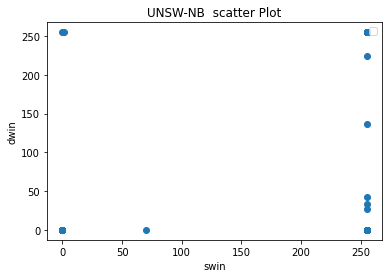

In [80]:

#Visualize data

import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# scatter the sepal_length against the sepal_width
ax.scatter(data['swin'], data['dwin'])
# set a title and labels
ax.set_title('UNSW-NB  scatter Plot')
ax.set_xlabel('swin')
ax.set_ylabel('dwin')
ax.legend()

In [78]:

#Line chart on some columns


/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


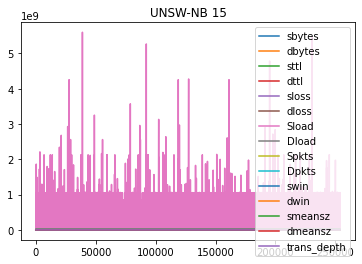

In [79]:
columns = ['sbytes','dbytes','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth']

# create x data
x_data = range(0, data.shape[0])

# create figure and axis
fig, ax = plt.subplots()

# plot each column
for column in columns:
    ax.plot(x_data, data[column], label=column)

# set title and legend
ax.set_title('UNSW-NB 15')
ax.legend()

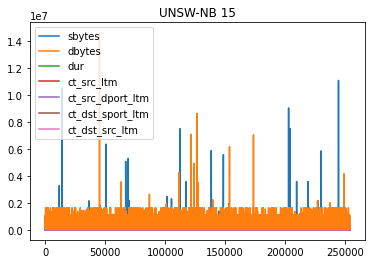

In [81]:
columns = ['sbytes','dbytes','dur','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',]
# create x data
x_data = range(0, data.shape[0])
# create figure and axis
fig, ax = plt.subplots()
# plot each column
for column in columns:
    ax.plot(x_data, data[column], label=column)
# set title and legend
ax.set_title('UNSW-NB 15')
ax.legend()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':


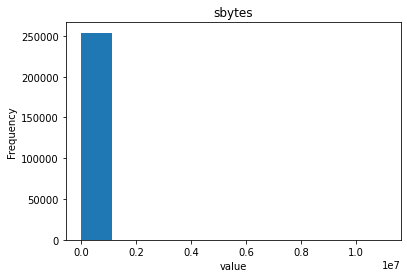

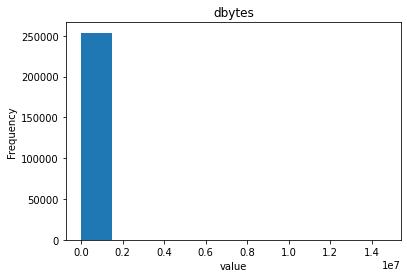

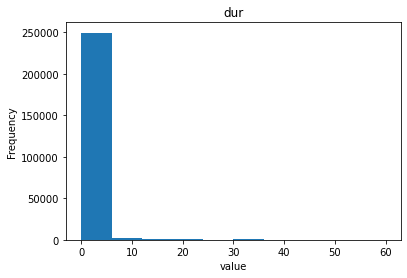

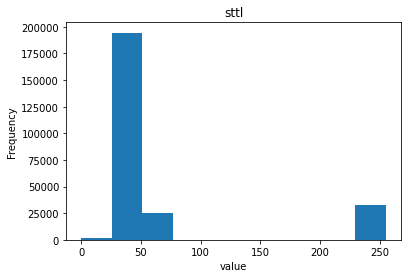

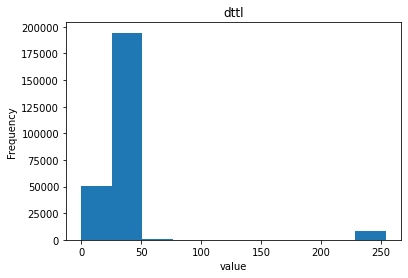

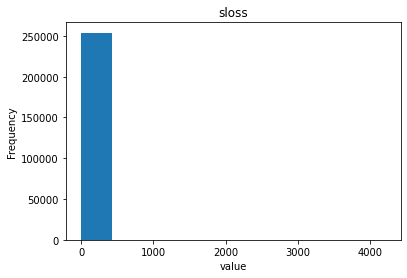

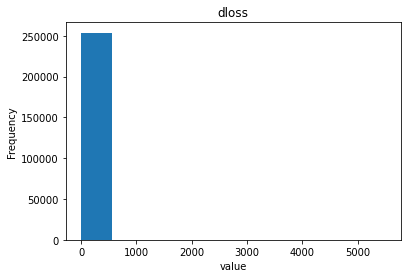

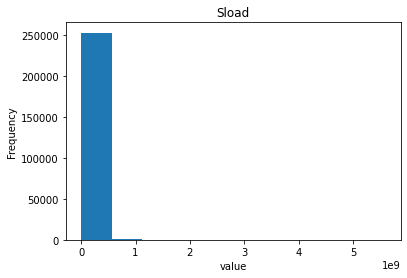

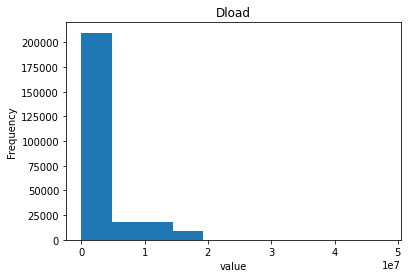

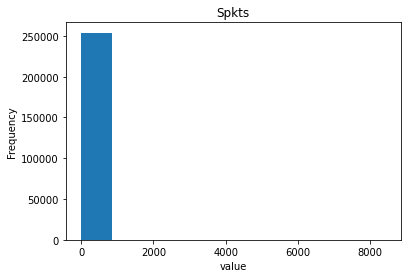

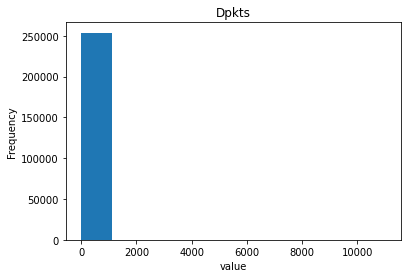

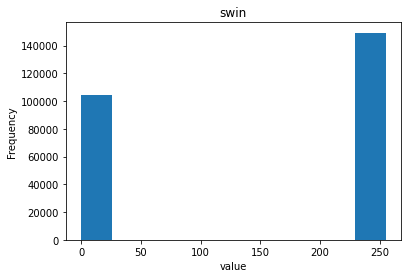

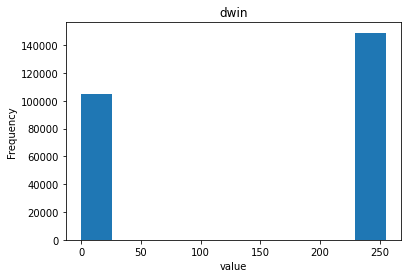

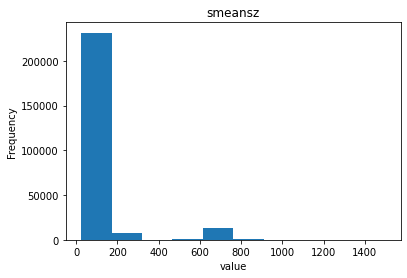

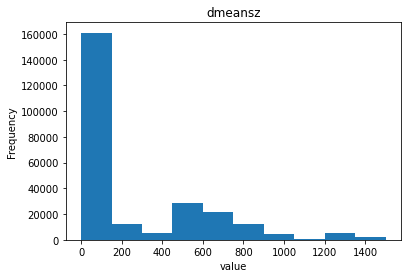

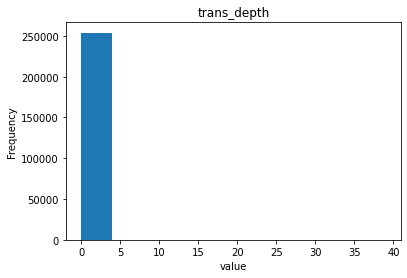

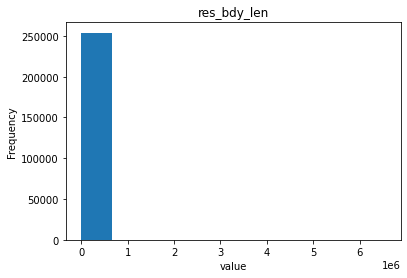

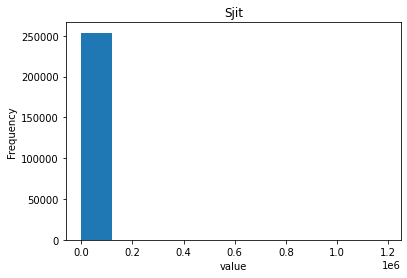

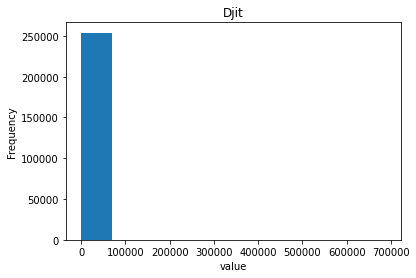

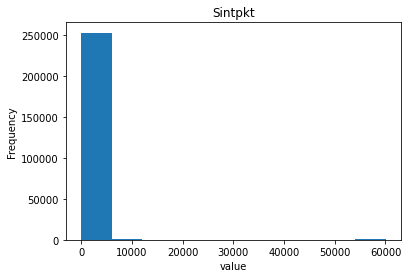

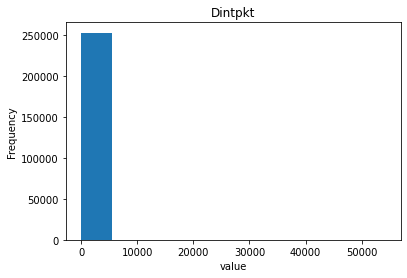

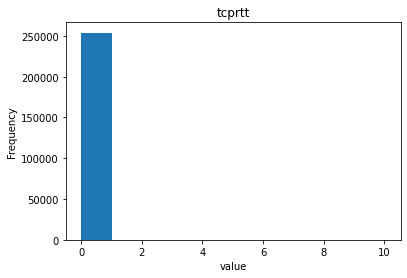

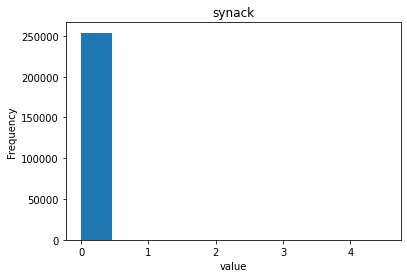

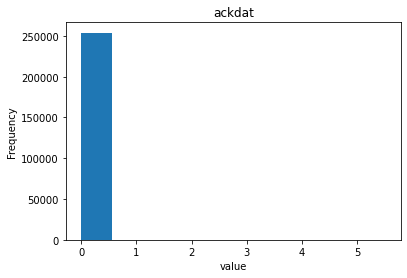

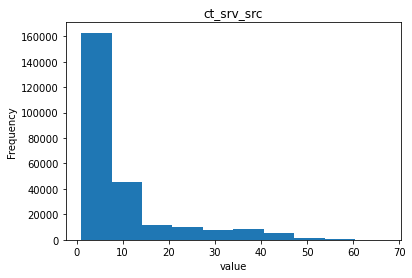

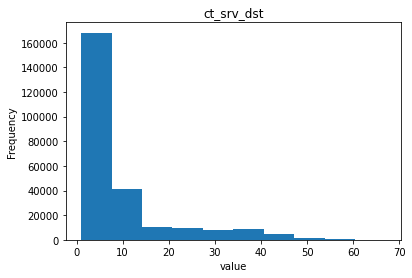

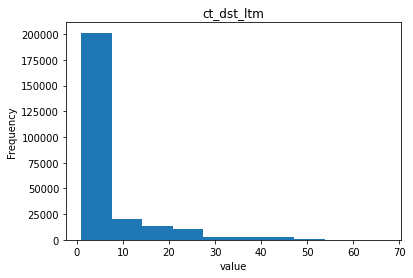

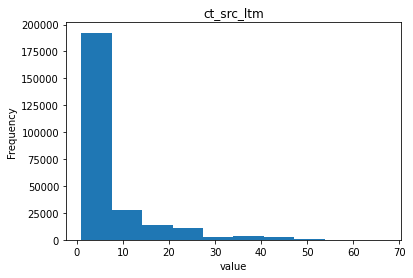

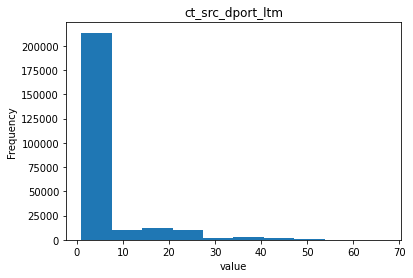

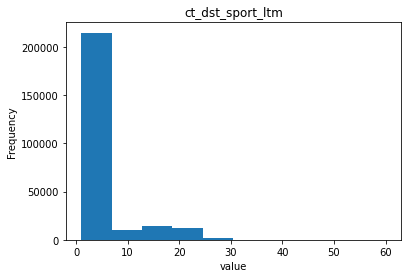

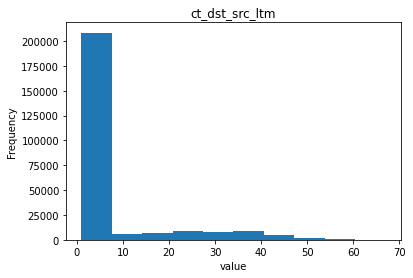

In [82]:


#Histograms 



columns = ['sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm']

for i in range(len(columns)):
    fig, ax = plt.subplots()

    # plot histogram
    ax.hist(data[columns[i]])
    
    # set title and labels
    ax.set_title(columns[i])
    ax.set_xlabel('value')
    ax.set_ylabel('Frequency')

Text(0, 0.5, 'Frequency')

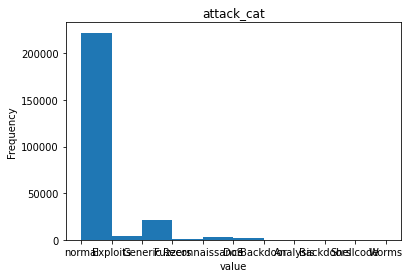

In [83]:

#On attack_cat

fig, ax = plt.subplots()

# plot histogram
ax.hist(data['attack_cat'])

# set title and labels
ax.set_title('attack_cat')
ax.set_xlabel('value')
ax.set_ylabel('Frequency')

0


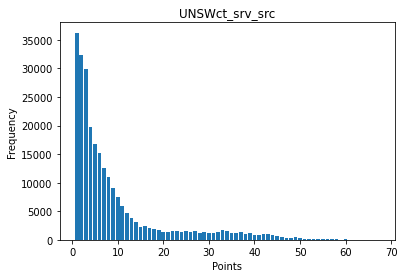

1


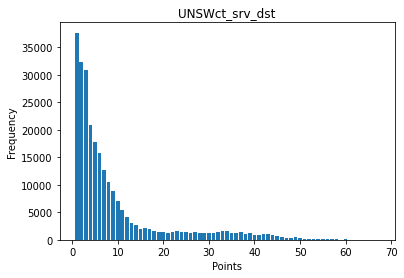

2


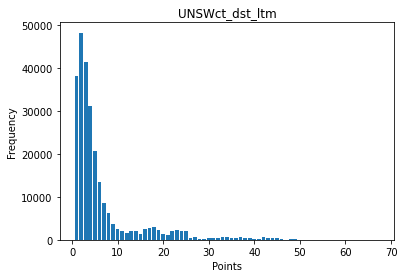

3


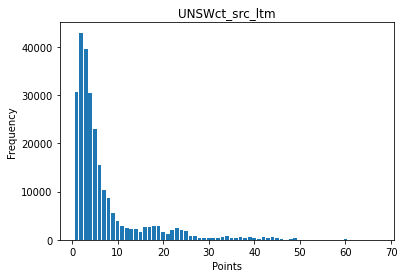

4


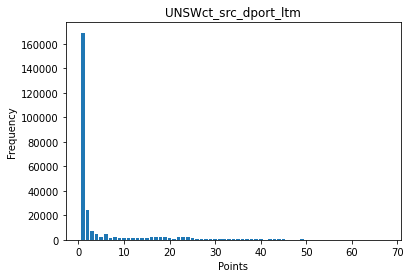

5


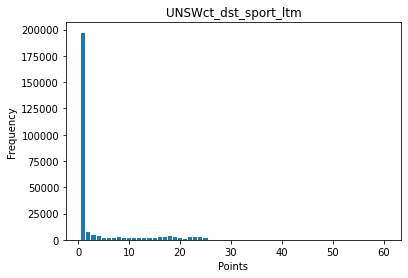

6


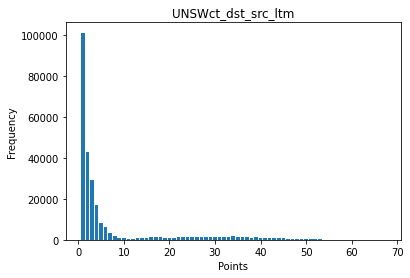

7


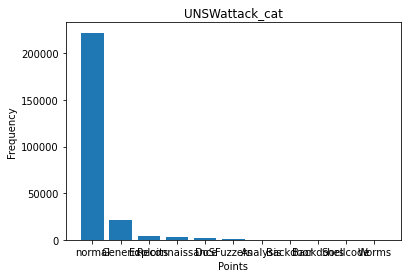

8


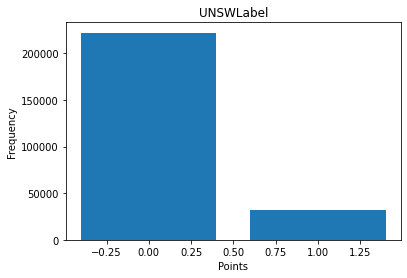

In [84]:


# Bar Charts


columns = ['ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
          'attack_cat','Label']
for i in range(len(columns)):
    print(i)

    # create a figure and axis 
    fig, ax = plt.subplots() 
    
    # count the occurrence of each class 
    data1 = data[columns[i]].value_counts() 
    
    # get x and y data 
    points = data1.index 
    frequency = data1.values 
    
    # create bar chart 
    ax.bar(points, frequency) 
    
    # set title and labels 
    ax.set_title('UNSW' + columns[i]) 
    ax.set_xlabel('Points') 
    ax.set_ylabel('Frequency')
    plt.show()

In [85]:



# Now that the data is all set, let's split it into training and test. I'll be using 80% of it.





In [86]:
(trainingData, testData) = sdf1.randomSplit([0.8, 0.2],seed = 11)

In [87]:
trainingData.show(5)

+-----+--------------------+------+------+----+----+-----+-----+--------+---------+-----------+-----+-----+----+----+-------+-------+-----------+-----------+------------------+------------------+----------+------------------+--------------------+--------------------+-------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+--------------------+
|   id|                 dur|sbytes|dbytes|sttl|dttl|sloss|dloss| service|    Sload|      Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|              Sjit|              Djit|   Sintpkt|           Dintpkt|              tcprtt|              synack| ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_dst_src_ltm|attack_cat|Label|xProto|xState|xSer|            features|
+-----+-

In [88]:
testData.show()

+------+--------------------+------+------+----+----+-----+-----+-------+------------------+------------------+-----+-----+----+----+-------+-------+-----------+-----------+------------------+------------------+--------------------+------------------+--------------------+--------------------+--------------------+---------------+------------+----------------+------------+----------+----------+----------+----------+----------+----------------+----------------+--------------+----------+-----+------+------+----+--------------------+
|    id|                 dur|sbytes|dbytes|sttl|dttl|sloss|dloss|service|             Sload|             Dload|Spkts|Dpkts|swin|dwin|smeansz|dmeansz|trans_depth|res_bdy_len|              Sjit|              Djit|             Sintpkt|           Dintpkt|              tcprtt|              synack|              ackdat|is_sm_ips_ports|ct_state_ttl|ct_flw_http_mthd|is_ftp_login|ct_ftp_cmd|ct_srv_src|ct_srv_dst|ct_dst_ltm|ct_src_ltm|ct_src_dport_ltm|ct_dst_sport_ltm|ct_

In [89]:

#Counting toatal no of rows in training and testing data

print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 203213
Test Dataset Count: 50761


In [90]:
trainingData.columns

['id',
 'dur',
 'sbytes',
 'dbytes',
 'sttl',
 'dttl',
 'sloss',
 'dloss',
 'service',
 'Sload',
 'Dload',
 'Spkts',
 'Dpkts',
 'swin',
 'dwin',
 'smeansz',
 'dmeansz',
 'trans_depth',
 'res_bdy_len',
 'Sjit',
 'Djit',
 'Sintpkt',
 'Dintpkt',
 'tcprtt',
 'synack',
 'ackdat',
 'is_sm_ips_ports',
 'ct_state_ttl',
 'ct_flw_http_mthd',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_srv_src',
 'ct_srv_dst',
 'ct_dst_ltm',
 'ct_src_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'attack_cat',
 'Label',
 'xProto',
 'xState',
 'xSer',
 'features']

In [92]:
#Arranging all the columns 
#Arranging all the columns with craeting a new dataframe of teaining and test data


data1 = trainingData.select('id','xProto','xState','xSer','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload',
                    'Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit',
                    'Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                    'ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
                    'attack_cat','features','Label')
data2 = testData.select('id','xProto','xState','xSer','dur','sbytes','dbytes','sttl','dttl','sloss','dloss','service','Sload',
                    'Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit','Djit',
                    'Sintpkt','Dintpkt','tcprtt','synack','ackdat','is_sm_ips_ports','ct_state_ttl','ct_flw_http_mthd','is_ftp_login',
                    'ct_ftp_cmd','ct_srv_src','ct_srv_dst','ct_dst_ltm','ct_src_ltm','ct_src_dport_ltm','ct_dst_sport_ltm','ct_dst_src_ltm',
                    'attack_cat','features','Label')

In [94]:



###### ------ Binary Classification ------ ######

##### ------- Linear SVM ------- #######



In [95]:
#Linear SVC

from pyspark.ml.classification import LinearSVC

svm = LinearSVC(labelCol="Label", featuresCol="features")

#fitting training data data1
svm_model = svm.fit(data1)

#Transforming test data data2 by fitted model 
svm_prediction = svm_model.transform(data2)

#showing predicted model
svm_prediction.select("prediction", "Label", "features").show()


#Evaluating predicted model using BinaryClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="Label", rawPredictionCol="rawPrediction", metricName="areaUnderROC")


#Accuracy of our model
svm_accuracy = evaluator.evaluate(svm_prediction)
print("Accuracy of Support Vector Machine is = %g"% (svm_accuracy))
print("Test Error of Support Vector Machine = %g " % (1.0 - svm_accuracy))


+----------+-----+--------------------+
|prediction|Label|            features|
+----------+-----+--------------------+
|       0.0|    0|[1540.0,1644.0,0....|
|       0.0|    0|[2438.0,18508.0,0...|
|       0.0|    0|[146.0,178.0,9.87...|
|       0.0|    0|[146.0,178.0,0.00...|
|       1.0|    1|(31,[0,2,3,7,9,13...|
|       0.0|    0|[146.0,178.0,0.00...|
|       0.0|    0|(31,[0,2,3,7,9,13...|
|       0.0|    0|[9504.0,12298.0,0...|
|       0.0|    0|[146.0,178.0,0.00...|
|       0.0|    0|[3022.0,17186.0,0...|
|       0.0|    0|(31,[0,2,3,7,9,13...|
|       0.0|    0|[13246.0,548216.0...|
|       0.0|    0|[2750.0,27602.0,0...|
|       0.0|    0|[1684.0,10168.0,1...|
|       0.0|    1|[874.0,1170.0,0.6...|
|       0.0|    0|[4862.0,76316.0,0...|
|       1.0|    1|[822.0,1756.0,0.2...|
|       0.0|    0|[536.0,304.0,0.01...|
|       0.0|    0|[1580.0,10168.0,1...|
|       0.0|    0|[3210.0,27552.0,0...|
+----------+-----+--------------------+
only showing top 20 rows

Accuracy of Su

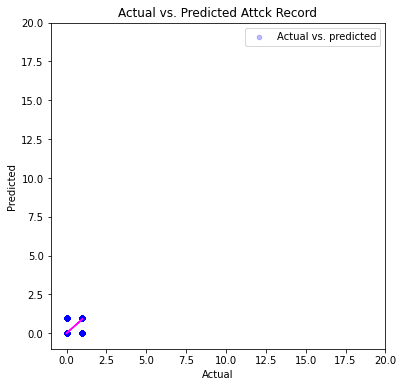

In [97]:
#Plotting Actual and predicted output of Label column

%matplotlib inline
import numpy as np

#Converting dataframe into pandas dataframe
sbdf = svm_prediction.select('prediction','Label').toPandas()

# PLOT 
ax = sbdf.plot(kind='scatter', figsize = (6,6), x='prediction', y='Label', color='blue', alpha = 0.25, label='Actual vs. predicted')
fit = np.polyfit(sbdf['prediction'], sbdf['Label'], deg=1)
ax.set_title('Actual vs. Predicted Attck Record')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.legend()
ax.plot(sbdf['prediction'], fit[0] * sbdf['prediction'] + fit[1], color='magenta')
plt.axis([-1, 20, -1, 20])
plt.show(ax)

In [120]:
#Confusion matrix 


tp = float(svm_prediction.filter("prediction == 1.0 AND Label == 1").count())
fp = float(svm_prediction.filter("prediction == 1.0 AND Label == 0").count())
tn = float(svm_prediction.filter("prediction == 0.0 AND Label == 0").count())
fn = float(svm_prediction.filter("prediction == 0.0 AND Label == 1").count())
pr = tp / (tp + fp)
re = tp / (tp + fn)


print( tp, "     ", fp)
print( fn, "     ", tn)
print('\n')
metrics = sparkSession.createDataFrame([
 ("TP", tp),
 ("FP", fp),
 ("TN", tn),
 ("FN", fn),
 ("Precision", pr),
 ("Recall", re),
 ("F1", 2*pr*re/(re+pr))],["metric", "value"])
metrics.show()

6104.0       560.0
206.0       43891.0


+---------+------------------+
|   metric|             value|
+---------+------------------+
|       TP|            6104.0|
|       FP|             560.0|
|       TN|           43891.0|
|       FN|             206.0|
|Precision|0.9159663865546218|
|   Recall|0.9673534072900158|
|       F1|0.9409588407584399|
+---------+------------------+



In [121]:



##### ------   Multi Class Classification   ------ ######

##### ------   Decision Tree Classifier  ------- ######





In [122]:
#Before applying Decision Tree Classifier on our data set we will do the following work on our data set:

#Vectorizing columns

from pyspark.ml.feature import VectorAssembler
colmss = ['xState','xSer','sbytes','dbytes','dur','sttl','dttl','sloss','dloss','Sload','Dload','Spkts','Dpkts','swin','dwin','smeansz','dmeansz','trans_depth','res_bdy_len','Sjit',
          'Djit','Sintpkt','Dintpkt','tcprtt','synack','ackdat','Label']
feature = VectorAssembler(inputCols= colmss[:],outputCol="features")
sdf1 = feature.transform(sdf)

In [123]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.feature import StringIndexer, VectorIndexer
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#from pyspark.mllib.util import MLUtils


# Index labels, adding metadata to the label column.
# Fit on whole dataset to include all labels in index.
labelIndexer = StringIndexer(inputCol="attack_cat", outputCol="indexedLabel").fit(sdf1)
# Automatically identify categorical features, and index them.
# We specify maxCategories so features with > 4 distinct values are treated as continuous.
featureIndexer =\
    VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories= 15).fit(sdf1)

# Split the data into training and test sets (30% held out for testing)
(trainingData, testData) = sdf1.randomSplit([0.7, 0.3])

# Train a DecisionTree model.
dt = DecisionTreeClassifier(labelCol="indexedLabel", featuresCol="indexedFeatures")

# Chain indexers and tree in a Pipeline
pipeline = Pipeline(stages=[labelIndexer, featureIndexer, dt])

# Train model.  This also runs the indexers.
model = pipeline.fit(trainingData)

# Make predictions.
predictions = model.transform(testData)

# Select example rows to display.
predictions.select("prediction", "indexedLabel", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = MulticlassClassificationEvaluator(
    labelCol="indexedLabel", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Test Error = %g" % (1.0 - accuracy))

treeModel = model.stages[2]
print(treeModel) # summary only
print("Accuracy = ", accuracy)

+----------+------------+--------------------+
|prediction|indexedLabel|            features|
+----------+------------+--------------------+
|       0.0|         0.0|[0.0,0.0,7816.0,1...|
|       0.0|         0.0|[0.0,0.0,4550.0,7...|
|       0.0|         0.0|(27,[0,2,3,4,5,6,...|
|       0.0|         0.0|[0.0,0.0,2438.0,1...|
|       0.0|         0.0|(27,[0,1,2,3,4,5,...|
+----------+------------+--------------------+
only showing top 5 rows

Test Error = 0.018977
DecisionTreeClassificationModel (uid=DecisionTreeClassifier_bcd9a87db3b7) of depth 5 with 29 nodes
Accuracy =  0.9810229508196722


In [124]:
tree = model.stages[-1]

display(tree) #visualize the decision tree model
print(tree.toDebugString) #print the nodes of the decision tree model


DecisionTreeClassificationModel (uid=DecisionTreeClassifier_bcd9a87db3b7) of depth 5 with 29 nodes

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_bcd9a87db3b7) of depth 5 with 29 nodes
  If (feature 26 in {0.0})
   Predict: 0.0
  Else (feature 26 not in {0.0})
   If (feature 1 in {1.0,3.0,12.0})
    If (feature 2 <= 122.0)
     If (feature 0 in {1.0})
      Predict: 2.0
     Else (feature 0 not in {1.0})
      If (feature 5 in {7.0,12.0})
       Predict: 4.0
      Else (feature 5 not in {7.0,12.0})
       Predict: 1.0
    Else (feature 2 > 122.0)
     If (feature 5 in {7.0})
      If (feature 2 <= 131.0)
       Predict: 4.0
      Else (feature 2 > 131.0)
       Predict: 2.0
     Else (feature 5 not in {7.0})
      If (feature 2 <= 2246.0)
       Predict: 4.0
      Else (feature 2 > 2246.0)
       Predict: 3.0
   Else (feature 1 not in {1.0,3.0,12.0})
    If (feature 5 in {7.0})
     If (feature 8 <= 2.5)
      If (feature 2 <= 983.0)
       Predict: 2.0
      Else (feature 2 > 983.0)
       Predict: 1.0
     Else (feature 8 > 2.5)
      Predict: 2.0
    Else (feature 5 

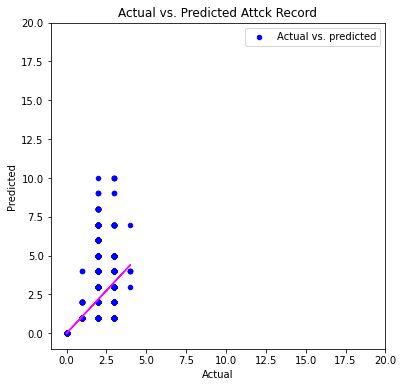

In [125]:
#Plot Between Actual and Predicted attck_cat
%matplotlib inline
import numpy as np

sbdf = predictions.select('prediction','indexedLabel').toPandas()

# PLOT 
ax = sbdf.plot(kind='scatter', figsize = (6,6), x='prediction', y='indexedLabel', color='blue', alpha = 1, label='Actual vs. predicted')
fit = np.polyfit(sbdf['prediction'], sbdf['indexedLabel'], deg=1)
ax.set_title('Actual vs. Predicted Attck Record')
ax.set_xlabel("Actual")
ax.set_ylabel("Predicted")
ax.plot(sbdf['prediction'], fit[0] * sbdf['prediction'] + fit[1], color='magenta')
plt.axis([-1, 20, -1, 20])
plt.show(ax)

In [126]:





###### ********* ---------  END  --------- ********* ########




